In [1]:
# data manipulation libraries
import pandas as pd
import numpy as np

# data visualiation
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

from sklearn.metrics import classification_report,confusion_matrix
import itertools

from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv') # load data

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.isnull().values.any()

False

In [6]:
df.fillna(0,inplace=True) # inplace filling missing data

In [7]:
df['DEATH_EVENT'].value_counts() # counting the number of deaths

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

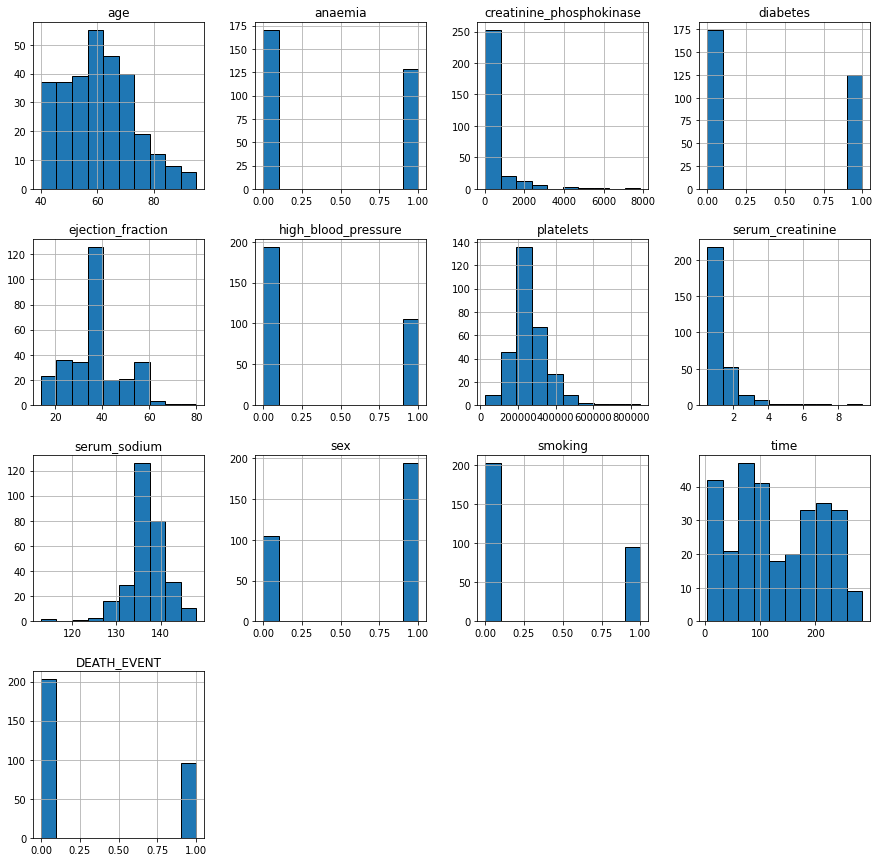

In [10]:
df.hist(figsize=(15,15),edgecolor='black');

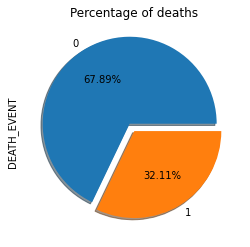

In [11]:
# calculating the percentage of deaths and plotting a pie-chart
df.DEATH_EVENT.value_counts().plot.pie(explode=[0.1,0],autopct='%1.2f%%',shadow=True)
plt.title('Percentage of deaths')
plt.show()

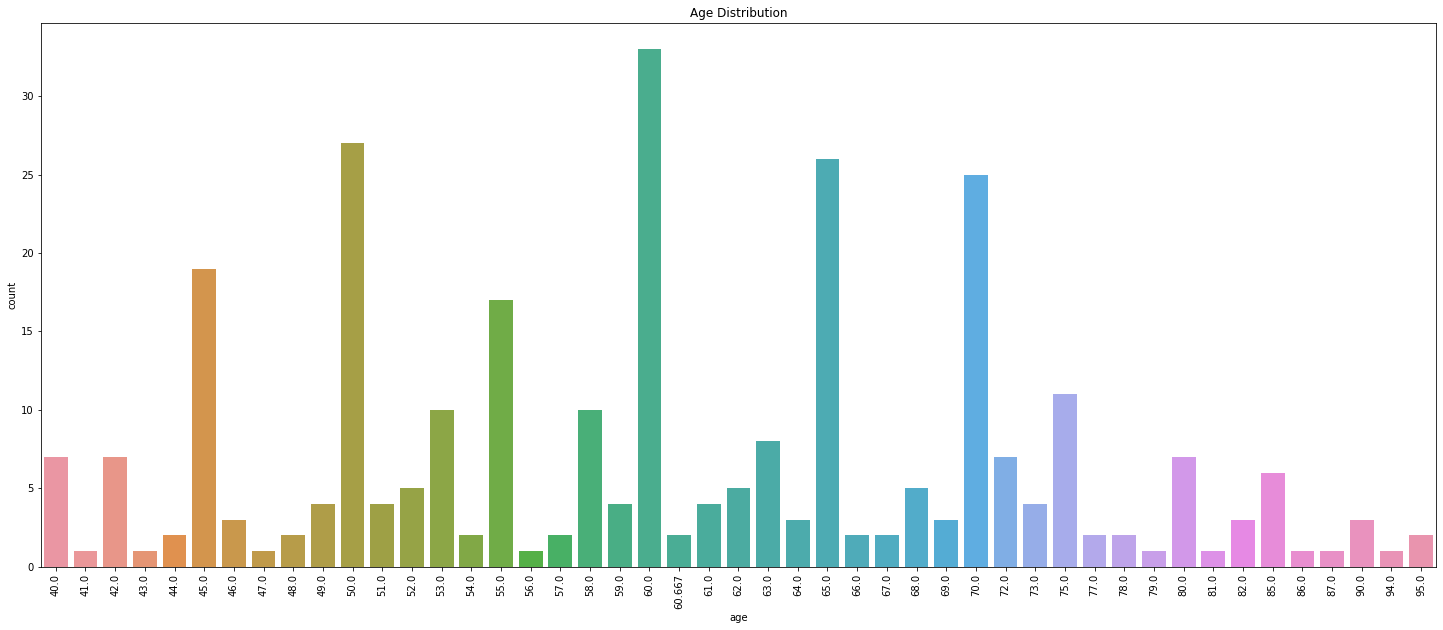

In [12]:
# plotting a bar-grape of age distribution

plt.figure(figsize=(25,10))
sns.countplot(x='age',data=df)
plt.xticks(rotation=90)
plt.title('Age Distribution')
plt.show()

In [13]:
X = df.values
X[0:2]


array([[7.5000000e+01, 0.0000000e+00, 5.8200000e+02, 0.0000000e+00,
        2.0000000e+01, 1.0000000e+00, 2.6500000e+05, 1.9000000e+00,
        1.3000000e+02, 1.0000000e+00, 0.0000000e+00, 4.0000000e+00,
        1.0000000e+00],
       [5.5000000e+01, 0.0000000e+00, 7.8610000e+03, 0.0000000e+00,
        3.8000000e+01, 0.0000000e+00, 2.6335803e+05, 1.1000000e+00,
        1.3600000e+02, 1.0000000e+00, 0.0000000e+00, 6.0000000e+00,
        1.0000000e+00]])

In [14]:
xt=X[:,0:11]
xt[0:1]

array([[7.50e+01, 0.00e+00, 5.82e+02, 0.00e+00, 2.00e+01, 1.00e+00,
        2.65e+05, 1.90e+00, 1.30e+02, 1.00e+00, 0.00e+00]])

In [15]:
y=X[:,12]
y[0:5]

array([1., 1., 1., 1., 1.])

In [16]:
# Standardising data
xt=preprocessing.StandardScaler().fit(xt).transform(xt)

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xt,y,test_size=0.85,random_state=4)

In [18]:
# displaying any confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')

    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.23 0.77]
 [0.06 0.94]]
              precision    recall  f1-score   support

         0.0       0.73      0.94      0.82       176
         1.0       0.62      0.23      0.33        79

    accuracy                           0.72       255
   macro avg       0.68      0.58      0.58       255
weighted avg       0.70      0.72      0.67       255



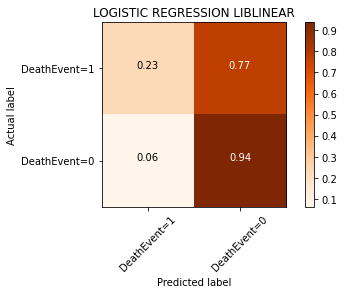

In [19]:
# Algorithm 1: K-Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier(n_neighbors=6).fit(xtrain,ytrain)
yknn=kn.predict(xtest)
cnf_matrix=confusion_matrix(ytest,yknn,labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['DeathEvent=1','DeathEvent=0'],normalize='False',title='LOGISTIC REGRESSION LIBLINEAR',cmap=plt.cm.Oranges)

print(classification_report(ytest,yknn))

In [20]:
# Algorithm 2: Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression


Normalized confusion matrix
[[0.57 0.43]
 [0.23 0.77]]
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.79       176
         1.0       0.53      0.57      0.55        79

    accuracy                           0.71       255
   macro avg       0.66      0.67      0.67       255
weighted avg       0.72      0.71      0.71       255



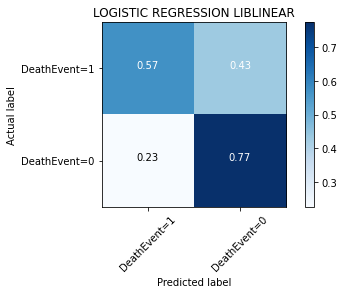

In [22]:
LR=LogisticRegression(C=0.01,solver="liblinear").fit(xtrain,ytrain)
ylr=LR.predict(xtest)

cnf_matrix=confusion_matrix(ytest,ylr,labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['DeathEvent=1','DeathEvent=0'],normalize='False',title='LOGISTIC REGRESSION LIBLINEAR',cmap=plt.cm.Blues)

print(classification_report(ytest,ylr))

In [23]:
# Algorithm 3: Support Vector Machine (SVM)

Normalized confusion matrix
[[0.43 0.57]
 [0.24 0.76]]
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75       176
         1.0       0.45      0.43      0.44        79

    accuracy                           0.66       255
   macro avg       0.60      0.60      0.60       255
weighted avg       0.66      0.66      0.66       255



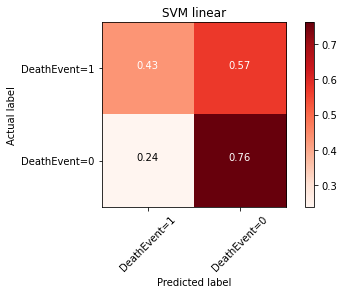

In [27]:
from sklearn import svm


svm=svm.SVC(kernel='linear')
svm.fit(xtrain,ytrain)
ysvm=svm.predict(xtest)

cnf_matrix=confusion_matrix(ytest,ysvm,labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['DeathEvent=1','DeathEvent=0'],normalize='False',title='SVM linear',cmap=plt.cm.Reds)

print(classification_report(ytest,ysvm))

In [25]:
#Comparing the accuracy of each algorithm

print(f"KNN Accuracy                  : {metrics.accuracy_score(ytest,yknn):.2f}")
print(f"Logistic Regression Accuracy  : {metrics.accuracy_score(ytest,ylr):.2f}")
print(f"SVM Accuracy                  : {metrics.accuracy_score(ytest,ysvm):.2f}")

KNN Accuracy                  : 0.72
Logistic Regression Accuracy  : 0.71
SVM Accuracy                  : 0.66
